# Permutation Score

In [43]:
from sklearn.model_selection import permutation_test_score

from numpy import mgrid, linspace, c_, arange, mean, array
from numpy.random import uniform, seed
from sklearn.datasets import make_circles
from matplotlib.pyplot import subplots, axes, scatter, xticks

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

RANDOM_STATE = 111

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Random Forest)': AdaBoostClassifier(RandomForestClassifier(random_state=RANDOM_STATE)),
    'Extra Trees': ExtraTreesClassifier(random_state=RANDOM_STATE),
    # 'AdaBoost (Extra Tree)': AdaBoostClassifier(ExtraTreesClassifier(random_state=RANDOM_STATE)),
    # 'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'SVC (Linear)': LinearSVC(random_state=RANDOM_STATE),
    'SVC (RBF)': SVC(random_state=RANDOM_STATE),
    'Multi-layer Perceptron': MLPClassifier(max_iter=5000, random_state=RANDOM_STATE)
}


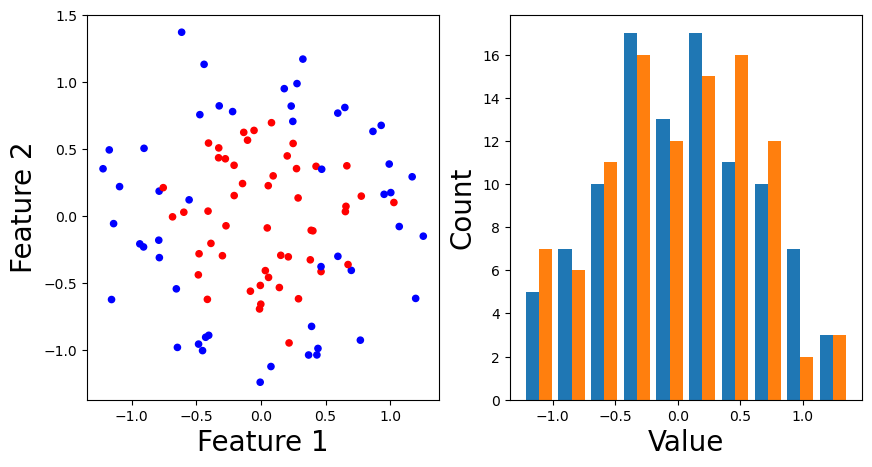

In [44]:
X, y = make_circles(n_samples=100, factor=0.5, noise=.2, random_state=RANDOM_STATE)

fig, ax = subplots(figsize=(10, 5), nrows=1, ncols=2)

ax[0].scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='bwr');

ax[0].set_xlabel('Feature 1', fontsize=20)
ax[0].set_ylabel('Feature 2', fontsize=20)
ax[1].hist(X);
ax[1].set_xlabel('Value', fontsize=20)
ax[1].set_ylabel('Count', fontsize=20);


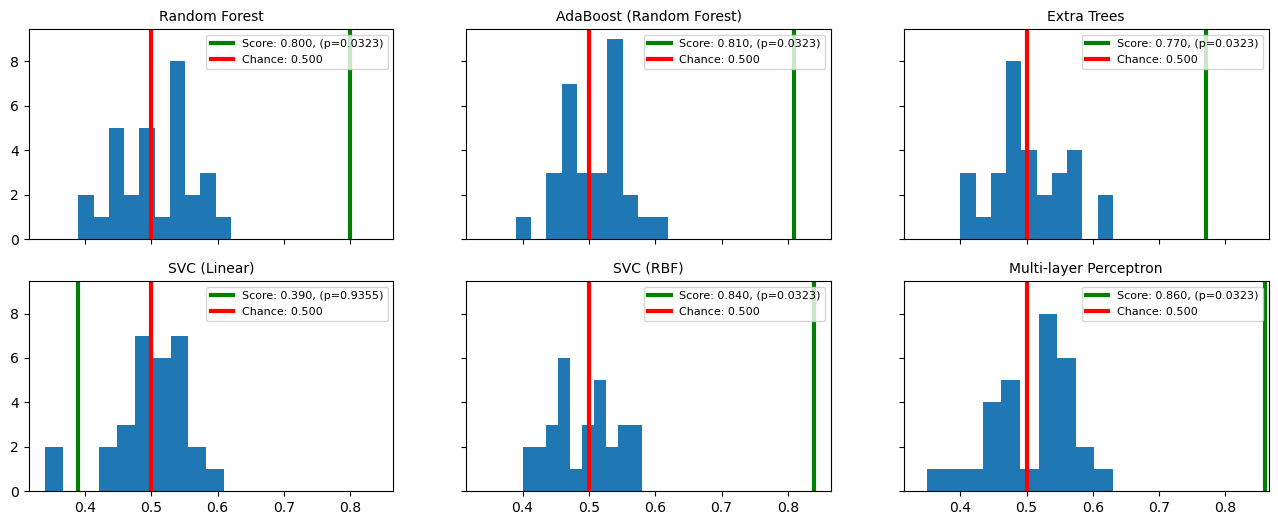

/Users/geroldbaier/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/geroldbaier/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/geroldbaier/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/geroldbaier/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/geroldbaier/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/geroldbaier/opt/anaconda3/lib/python3.8/sit

In [45]:
n_classes = 2

chance = 1 / n_classes

fig, axes = subplots(figsize=[16, 6], ncols=3, nrows=2, sharey=True, sharex=True) 

for ax, (name, clf) in zip(axes.ravel(), classifiers.items()):

    score, permutation_scores, pvalue = permutation_test_score(clf, X, y, 
                                                               scoring="accuracy", 
                                                               n_jobs=-1,
                                                               n_permutations=30) 
                                                               
    score_label = 'Score: {:.3f}, (p={:.4f})'.format(score, pvalue)

    chance_label = 'Chance: {:.3f}'.format(chance)
    
    ax.hist(permutation_scores) 
    ax.axvline(score,  c='g', label=score_label,  linewidth=3.0) 
    ax.axvline(chance, c='r', label=chance_label, linewidth=3.0)
    ax.set_title(name, fontsize=10) 
    ax.legend(fontsize=8);


# With Patients Data

In [46]:
from pandas import read_csv

In [48]:
# Please adjust path according to operating system & personal path to file
df = read_csv('data/patients_data.csv')

print('Number of columns: ', len(df.columns))
print('Number of rows: ', len(df))
print('')

data = df.to_numpy()

print(data[0, :])
print('')
print(data[:, 5])


Number of columns:  7
Number of rows:  100

[38 71 176.0 124.0 93.0 1 'Male']

[1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1
 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0]


In [49]:
X = data[:,:5]
y = data[:,5] == 1

print(X.shape, y.shape)


(100, 5) (100,)


In [50]:
y

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
        True, False,  True, False,  True, False,  True,  True, False,
       False, False, False, False,  True,  True,  True,  True, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False,  True, False, False,  True,  True,  True,  True, False,
        True, False, False, False, False,  True,  True, False,  True,
       False])

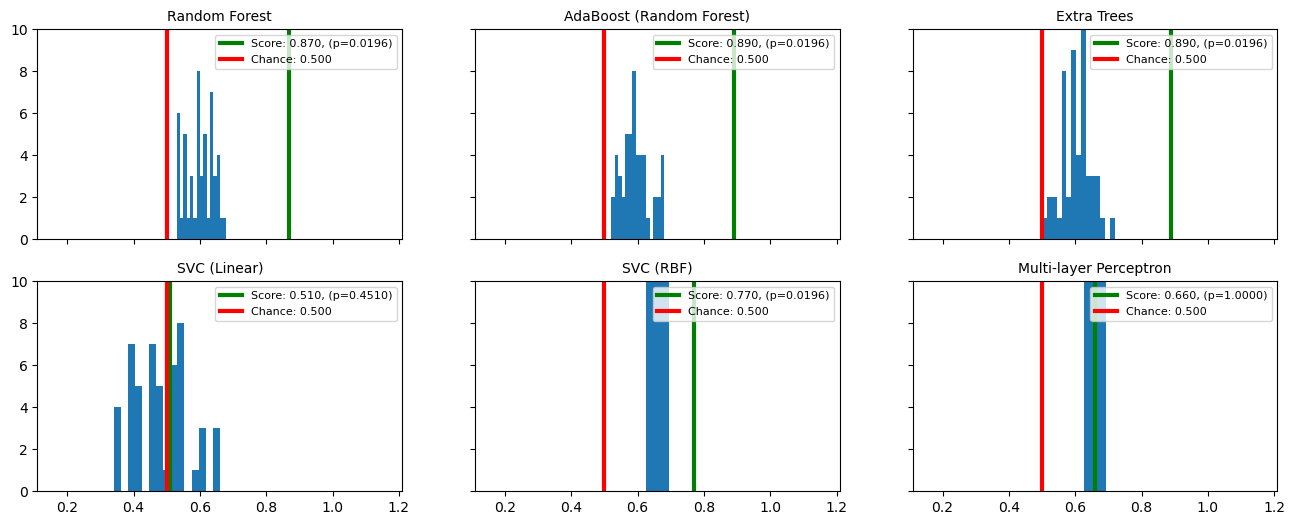

/Users/geroldbaier/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/geroldbaier/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/geroldbaier/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/geroldbaier/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/geroldbaier/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/geroldbaier/opt/anaconda3/lib/python3.8/sit

In [51]:
fig, ax = run_and_plot_pts(X, y, classifiers)


## Function that ignores convergence warnings

from https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_early_stopping.html#sphx-glr-auto-examples-linear-model-plot-sgd-early-stopping-py


In [39]:
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils._testing import ignore_warnings

@ignore_warnings(category=ConvergenceWarning)

def run_and_plot_pts(X, y, classifiers):

    n_classes = 2

    chance = 1 / n_classes

    fig, axes = subplots(figsize=[16, 6], ncols=3, nrows=2, sharey=True, sharex=True) 

    for ax, (name, clf) in zip(axes.ravel(), classifiers.items()):

        score, permutation_scores, pvalue = permutation_test_score(clf, X, y, 
                                                                   scoring="accuracy", 
                                                                   n_jobs=-1,
                                                                   n_permutations=50) 

        score_label  = 'Score: {:.3f}, (p={:.4f})'.format(score, pvalue)

        chance_label = 'Chance: {:.3f}'.format(chance)

        ax.hist(permutation_scores, bins=15) 
        ax.axvline(score,  c='g', label=score_label,  linewidth=3.0) 
        ax.axvline(chance, c='r', label=chance_label, linewidth=3.0)
        ax.set_ylim(0, 10)
        ax.set_title(name, fontsize=10) 
        ax.legend(fontsize=8);
        
    return fig, ax
